In [1]:
import serial
import serial.tools
import serial.tools.list_ports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm

# Serial Setup

In [2]:
ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Port: '{port.device}' - {port.description}")

Port: '/dev/cu.debug-console' - n/a
Port: '/dev/cu.ZihuiAndysPowerbeatsPro' - n/a
Port: '/dev/cu.Bluetooth-Incoming-Port' - n/a
Port: '/dev/cu.usbmodem21101' - IOUSBHostDevice


In [4]:
ser = serial.Serial('/dev/cu.usbmodem21101', 9600, timeout=None)

In [5]:
def get_accelerometer_data():
    ser.reset_input_buffer()
    while True:
        try:
            data = ser.readline().decode('utf-8').strip()
            data_splitted = list(map(int, data.split(',')))
            
            if len(data_splitted) == 3:
                break
        except:
            pass
    return np.array(data_splitted)

# Vector Operations

In [6]:
def get_magnitude(vec):
    return np.sqrt(np.dot(vec, vec))

In [7]:
def get_unit_vector(vec):
    return vec / get_magnitude(vec)

In [8]:
def get_angle_btwn_vecs(vec1, vec2):
    vec1_h = get_unit_vector(vec1)
    vec2_h = get_unit_vector(vec2)
    
    return np.arccos(np.dot(vec1_h, vec2_h))

def to_degree(radian):
    return 180 * radian / np.pi

In [9]:
def projection(from_, to):
    to_h = get_unit_vector(to)
    return np.dot(from_, to_h) * to_h

In [10]:
def gram_schmidt(datum, vec):
    return get_unit_vector(vec - projection(vec, datum))

# Vector Visualization

In [11]:
arr = []
for i in range(20):
    entry = get_unit_vector(get_accelerometer_data())
    print(entry)
    arr.append(entry)
    
arr = np.array(arr)

[ 0.04338273 -0.01289757  0.99897527]
[ 0.04367523 -0.01564045  0.99892335]
[ 0.00857616 -0.03768314  0.99925294]
[-0.3952968  -0.59582159  0.69909733]
[0.34207339 0.31550095 0.88512425]
[-0.27927684 -0.55095829  0.78641554]
[0.05710855 0.39582136 0.91655009]
[ 0.210815   -0.3097918   0.92713865]
[-0.57160696 -0.52908367  0.62716502]
[-0.71794231 -0.12811557  0.6842114 ]
[-0.32082292 -0.46320891  0.82614173]
[0.52185879 0.23906698 0.81884698]
[-0.02572528  0.50307223  0.86386141]
[-0.38566955 -0.55813446  0.73467334]
[0.22235349 0.26670972 0.93777655]
[-0.53026153 -0.40989697  0.74216385]
[-0.53708147 -0.28229268  0.79489266]
[0.31875094 0.15164174 0.93562953]
[-0.37879405 -0.43002837  0.81950636]
[ 0.13749052 -0.48276514  0.86488969]


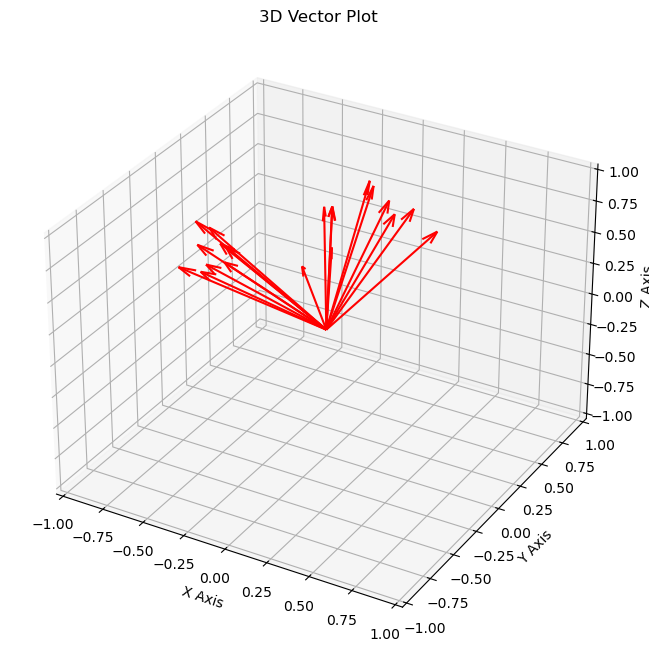

In [12]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

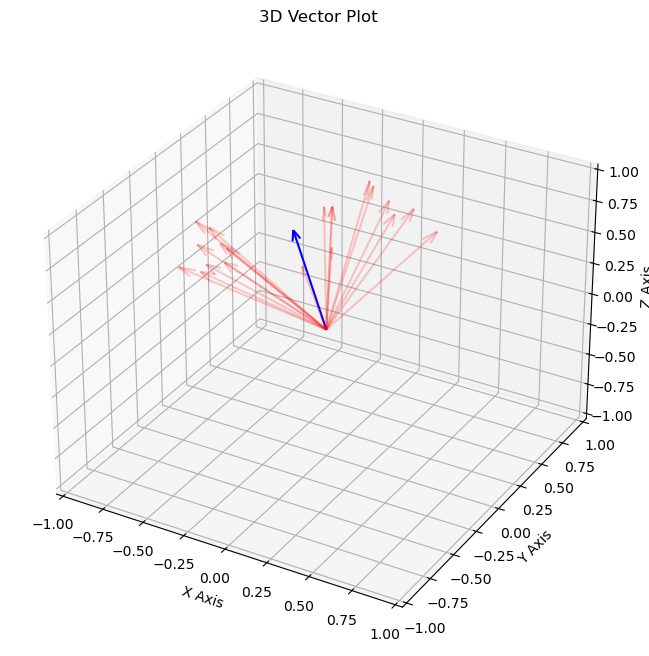

In [13]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1, alpha=0.2)

mean_vec = np.mean(arr, axis=0)
ax.quiver(0, 0, 0, *mean_vec, color='b', arrow_length_ratio=0.1)


# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

# 1 vector datum approach

## Sample the datum

In [14]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1_arr = np.array(datum_1_arr)

100%|██████████| 20/20 [00:08<00:00,  2.33it/s]


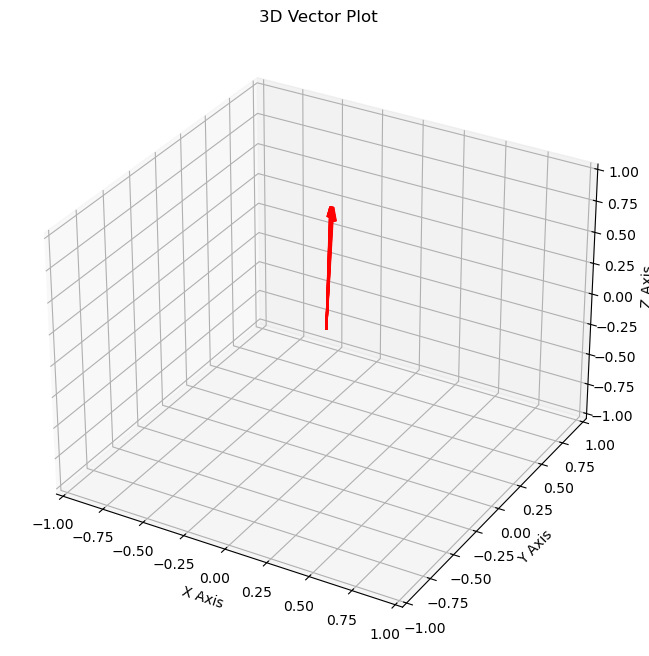

In [15]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in datum_1_arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [16]:
datum_1 = np.mean(datum_1_arr, axis=0)
datum_1

array([ 0.0425328 , -0.02073279,  0.99886301])

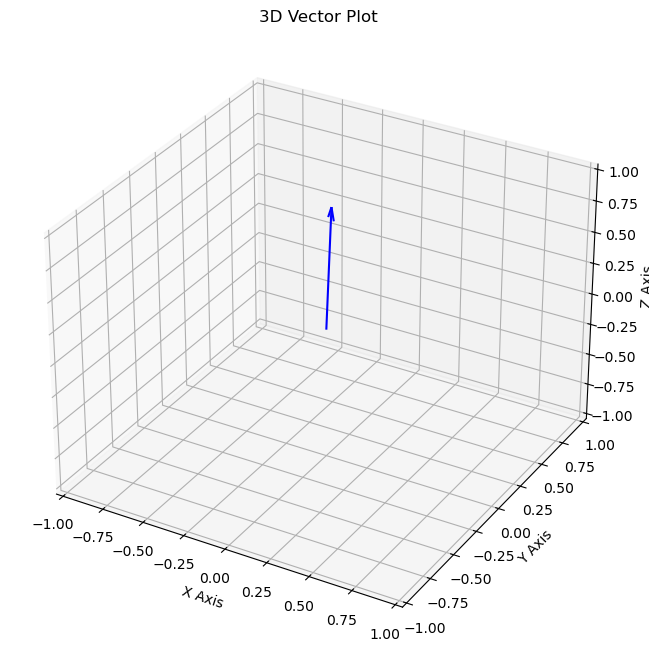

In [17]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get another measurement

In [18]:
vec = []
for i in tqdm(range(5)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = get_unit_vector(np.mean(np.array(vec), axis=0))
vec

100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


array([0.70909477, 0.09800259, 0.69826936])

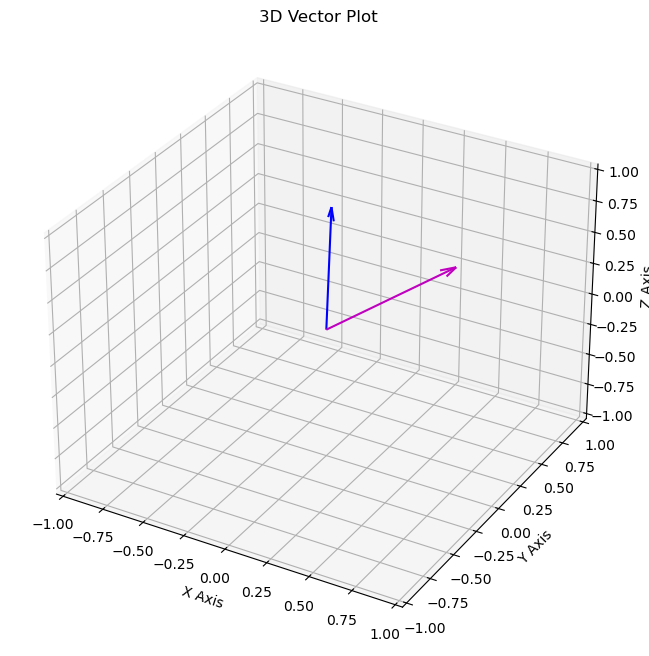

In [19]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [20]:
to_degree(get_angle_btwn_vecs(datum_1, vec))

43.47991569472467

100%|██████████| 5/5 [00:02<00:00,  2.26it/s]


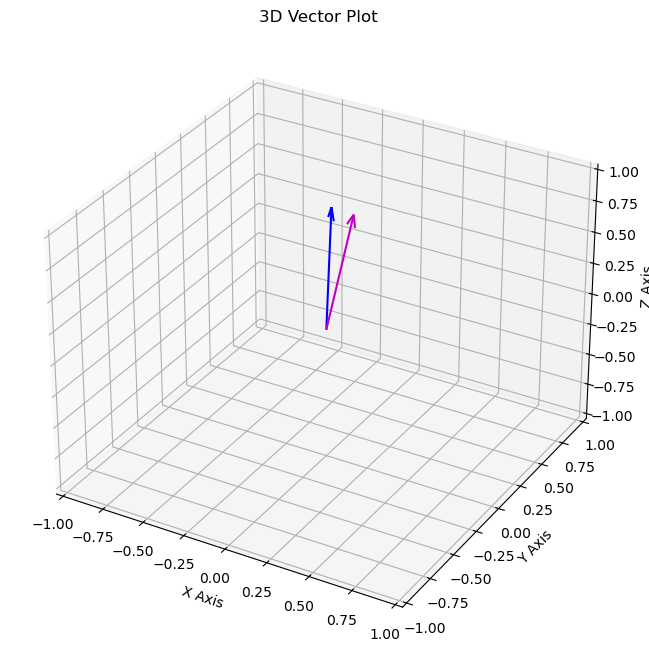

7.497520357526092


In [24]:
vec = []
for i in tqdm(range(5)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = np.mean(np.array(vec), axis=0)
vec
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()
print(to_degree(get_angle_btwn_vecs(datum_1, vec)))

In [25]:
for i in range(20):
    vec = get_unit_vector(get_accelerometer_data())
    print(f"{vec}\t angle = {to_degree(get_angle_btwn_vecs(datum_1, vec))}")

[ 0.04050258 -0.02069475  0.9989651 ]	 angle = 0.116487550357226
[ 0.04224302 -0.02170822  0.9988715 ]	 angle = 0.05829679730700935
[ 0.04724185 -0.02640849  0.99853433]	 angle = 0.42297197209273024
[ 0.03759591 -0.02156665  0.99906027]	 angle = 0.2870933150677634
[ 0.0923487  -0.0159615   0.99559879]	 angle = 2.873720838546931
[ 0.20818172 -0.01916317  0.97790242]	 angle = 9.578317269279966
[ 0.21384498 -0.02776836  0.97647286]	 angle = 9.91961552562661
[ 0.27304634 -0.01476709  0.96188753]	 angle = 13.411361118134334
[ 0.28409339 -0.01020869  0.95874226]	 angle = 14.078463100633137
[ 0.12634882 -0.02227961  0.99173565]	 angle = 4.82191407047255
[ 0.0351788  -0.01921531  0.99919629]	 angle = 0.4306571128359136
[ 0.03822719 -0.01176221  0.99919985]	 angle = 0.5704462507666543
[0.03016204 0.01302452 0.99946016]	 angle = 2.0603460590743867
[ 0.06824053 -0.01301197  0.99758404]	 angle = 1.539742938356167
[ 0.04779361 -0.18434678  0.98169855]	 angle = 9.441412451162813
[ 0.0387819  -0.3553

# 2 Data Approach

In [26]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1 = get_unit_vector(np.mean(datum_1_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.02it/s]


In [27]:
datum_2_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_2_arr.append(entry)
    
datum_2 = get_unit_vector(np.mean(datum_2_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.01it/s]


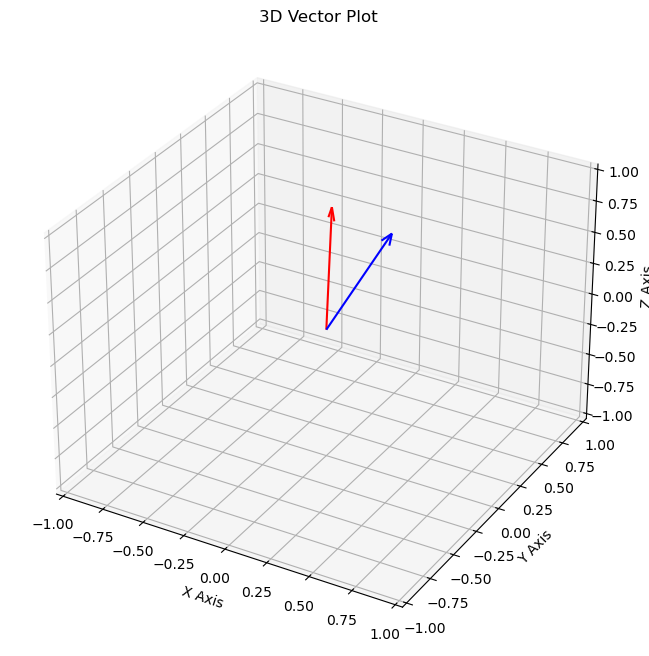

In [28]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Orthogonal Basis

In [29]:
p = projection(datum_2, datum_1)

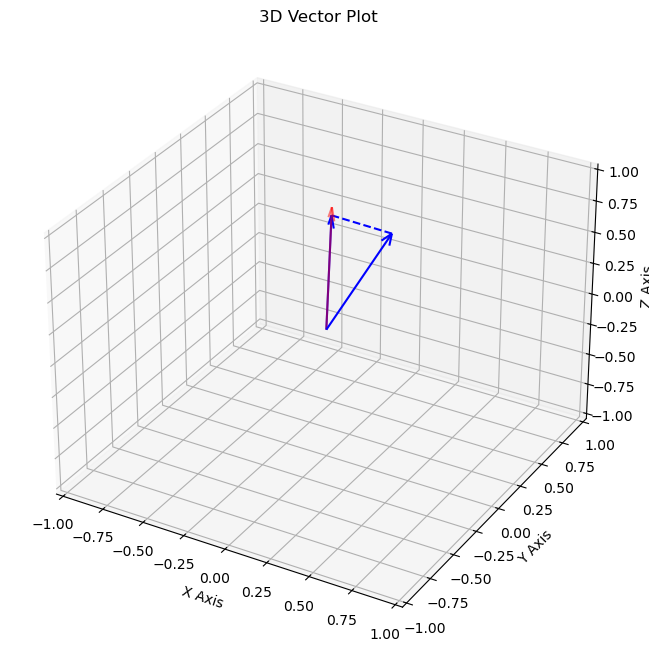

In [30]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1, alpha=0.5)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p, color='b', arrow_length_ratio=0.1)

ax.plot3D(*zip(datum_2, p), color="b", linestyle='dashed')


# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

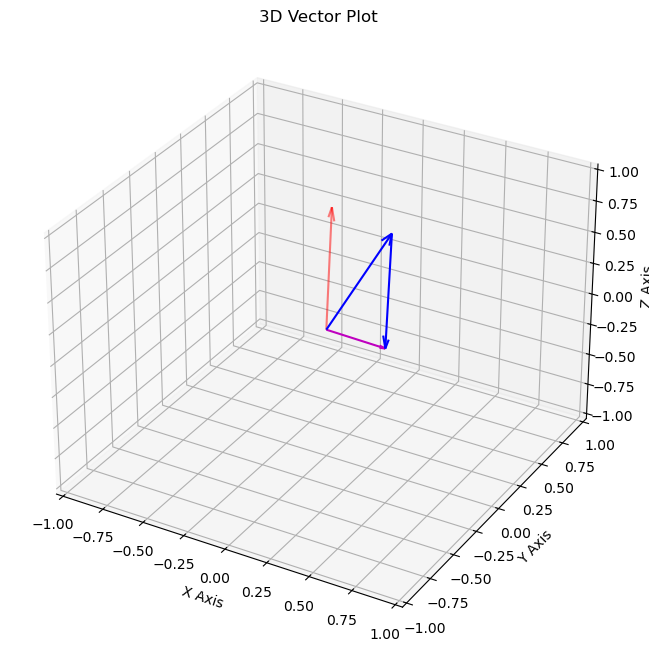

In [31]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1, alpha=0.5)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)
ax.quiver(*datum_2, *-p, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *(datum_2-p), color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [32]:
datum_1_basis = datum_1
datum_2_basis = gram_schmidt(datum_1, datum_2)

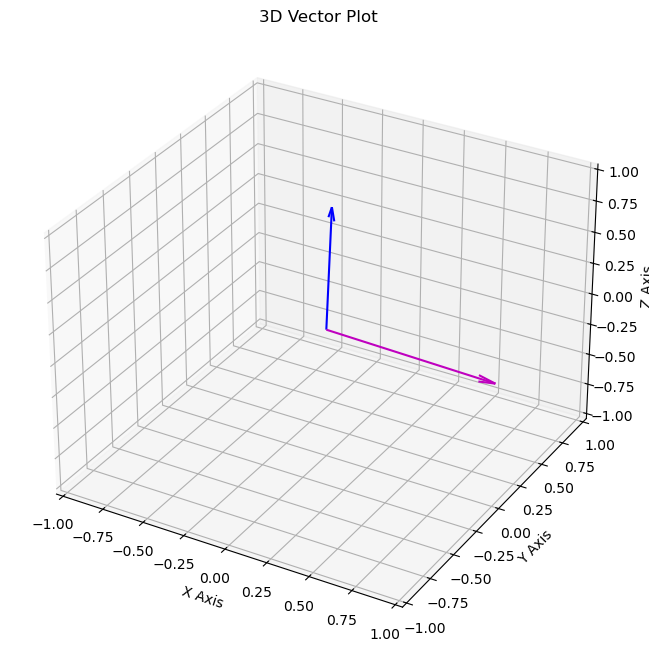

In [33]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get more data

In [34]:
vec = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = np.mean(vec, axis=0)

100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


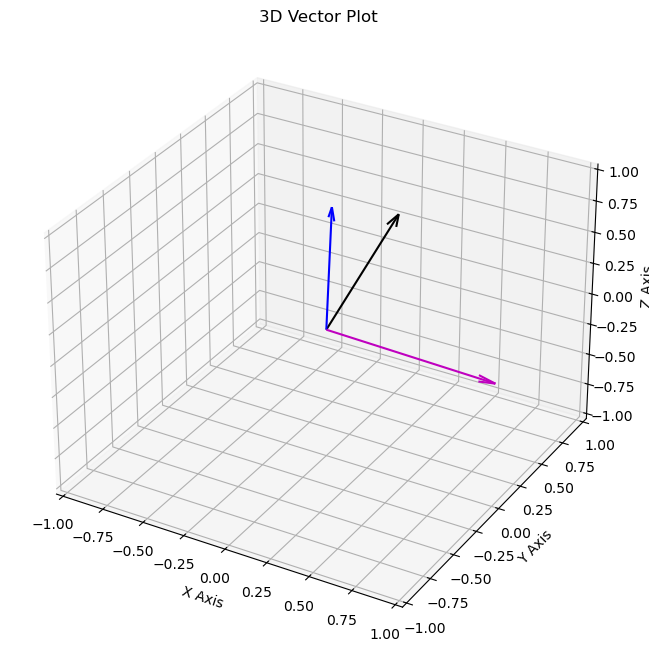

In [35]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [36]:
p1 = projection(vec, datum_1_basis)
p2 = projection(vec, datum_2_basis)

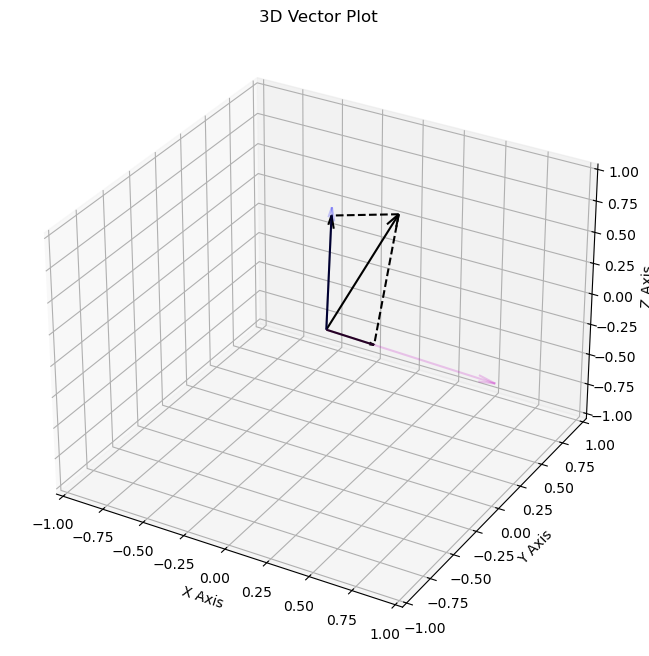

In [37]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p1, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p2, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(vec, p1), color="k", linestyle='dashed')
ax.plot3D(*zip(vec, p2), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

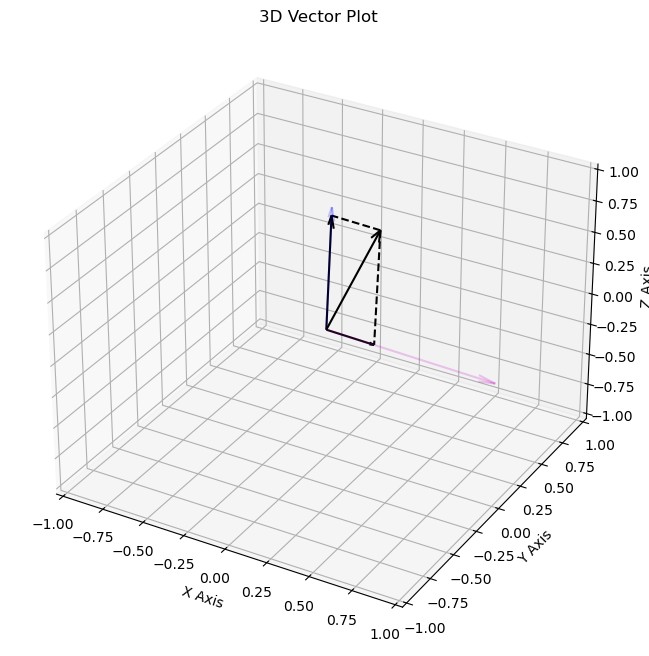

In [38]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *(p1+p2), color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p1, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p2, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(p1+p2, p1), color="k", linestyle='dashed')
ax.plot3D(*zip(p1+p2, p2), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [39]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    vec_basis = get_unit_vector(projection(vec, datum_1_basis) + projection(vec, datum_2_basis))
    
    print(f"angle = {to_degree(get_angle_btwn_vecs(vec_basis, datum_1_basis))}")
    

angle = 0.30003612135041646
angle = 0.19810336103432571
angle = 0.059412736682295526
angle = 0.19078687034646907
angle = 0.15788255618359046
angle = 0.15357458845787791
angle = 0.9180940619842822
angle = 5.330750730388482
angle = 24.300936727602103
angle = 29.589640183596487
angle = 2.9243688571300925
angle = 1.586100715878969
angle = 0.4748952637704724
angle = 0.15282955678585694
angle = 0.4831345759285941
angle = 1.1022900444059813
angle = 1.1618338702294582
angle = 1.1947835080909928
angle = 1.0107788659756038
angle = 0.5739797503637953
angle = 0.010333218398403038
angle = 21.59320965246172
angle = 50.68368544449439
angle = 18.447140026301668
angle = 0.7833872171831835
angle = 13.344434391471328
angle = 23.603762307543658
angle = 28.69646701612647
angle = 24.942501198803836
angle = 0.18864176975759628
angle = 0.28521027388859166
angle = 0.06322938015199572
angle = 0.4405126578099929
angle = 9.213585053568472
angle = 37.04793462169394
angle = 48.57646997136314
angle = 38.390934949696

In [40]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    vec_basis = get_unit_vector(projection(vec, datum_1_basis) + projection(vec, datum_2_basis))
    
    print(f"angle = {to_degree(get_angle_btwn_vecs(vec_basis, datum_1_basis)) * np.sign(np.dot(vec_basis, datum_2_basis))}")

angle = 0.06807525377122942
angle = 0.08238765758103805
angle = -0.0028541207335567014
angle = 3.981663066453918
angle = 8.502901496571962
angle = 18.965217516196695
angle = 36.05179963900137
angle = 40.57349456145979
angle = 41.189734326263746
angle = 17.193735132532915
angle = -0.06890464749492184
angle = -0.015139019750856077
angle = 0.24061168883751488
angle = -17.47824974380841
angle = -26.11929376857732
angle = -34.159244159079165
angle = -44.8955556869506
angle = -33.04812591048088
angle = 0.7319432557048959
angle = -0.12929272207765455
angle = 0.9319151548013593
angle = 0.749661783112253
angle = 1.538279828340195
angle = 2.0184179779338707
angle = 1.717980669275686
angle = 0.4033124376209024
angle = -0.14153280763283002
angle = -0.6529647104458586
angle = 0.009727956320395234
angle = 1.0523116266440684
angle = -5.86648605164205
angle = -4.395675823728974
angle = -4.760664587024428
angle = -3.1977006942352735
angle = -15.487912709820279
angle = 1.7070856214745607
angle = 2.05544